In [13]:
import sounddevice as sd
import numpy as np
import queue
import threading
import time
import matplotlib.pyplot as plt

In [14]:
print(sd.query_devices())

  0 Realtek USB MIC: Audio (hw:2,0), ALSA (1 in, 0 out)
  1 pulse, ALSA (32 in, 32 out)
* 2 default, ALSA (32 in, 32 out)


In [15]:
SAMPLE_RATE = 16000        # 샘플링 레이트(Hz)
CHANNELS = 1               # 모노(1), 스테레오(2)
FRAME_DURATION = 0.1       # 프레임 길이(초)
FRAME_SIZE = int(SAMPLE_RATE * FRAME_DURATION)  # 한 번에 처리할 샘플 수

In [16]:
audio_queue = queue.Queue()

def audio_callback(indata, frames, time_info, status):
    """InputStream 콜백: 들어온 데이터를 큐에 넣어준다."""
    if status:
        print(f"경고: {status}")
    audio_queue.put(indata.copy())

def plot_thread(line, fig, ax):
    """별도 스레드에서 큐를 소비하며 플롯을 갱신."""
    while True:
        data = audio_queue.get()
        waveform = data.flatten()
        line.set_ydata(waveform)
        fig.canvas.draw()
        fig.canvas.flush_events()

In [17]:
def main():
    # matplotlib 실시간 플롯 설정
    plt.ion()
    fig, ax = plt.subplots()
    x = np.linspace(0, FRAME_DURATION, FRAME_SIZE)
    line, = ax.plot(x, np.zeros(FRAME_SIZE))
    ax.set_xlim(0, FRAME_DURATION)
    ax.set_ylim(-1, 1)
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude")
    ax.set_title("Real-time Audio Waveform")

    # 플롯 업데이트 스레드 시작
    threading.Thread(target=plot_thread, args=(line, fig, ax), daemon=True).start()

    # 입력 스트림 열기
    with sd.InputStream(samplerate=SAMPLE_RATE,
                        channels=CHANNELS,
                        blocksize=FRAME_SIZE,
                        callback=audio_callback):
        print("실시간 오디오 스트리밍. 종료하려면 Ctrl+C")
        try:
            while True:
                time.sleep(1)
        except KeyboardInterrupt:
            print("종료합니다.")

실시간 오디오 스트리밍. 종료하려면 Ctrl+C
종료합니다.


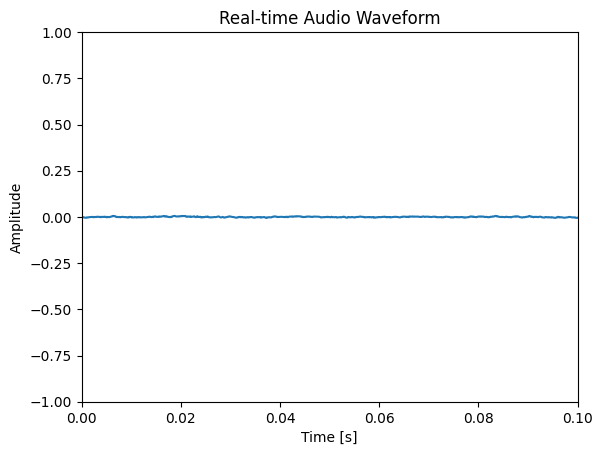

In [18]:
main()